# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
#from pylab import rcParms
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [19]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [20]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [21]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


In [22]:
sensor.isnull().sum().sum()

0

```There isn't any missing data here```

How many rows and columns are in our data?

In [23]:
sensor.count(axis='columns')

0       12
1       12
2       12
3       12
4       12
        ..
1746    12
1747    12
1748    12
1749    12
1750    12
Length: 1751, dtype: int64

In [24]:
sensor.count(axis='rows')

attitude.roll         1751
attitude.pitch        1751
attitude.yaw          1751
gravity.x             1751
gravity.y             1751
gravity.z             1751
rotationRate.x        1751
rotationRate.y        1751
rotationRate.z        1751
userAcceleration.x    1751
userAcceleration.y    1751
userAcceleration.z    1751
dtype: int64

```Both info and count indicate that there are 12 columns and 1751 rows.```

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [25]:
#df = pd.DataFrame()
x = pd.date_range("1/1/2018 00:00:00","1/1/2018 00:29:10", periods=sensor.shape[0], freq=None)
x.freq = pd.infer_freq(x)
#s.infer_freq
#x.freq = t
x


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [26]:
#sensor.index = pd.DatetimeIndex(x)
#sensor["Time"] = x
#sensor.index = sensor["Time"]
sensor.index = x


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

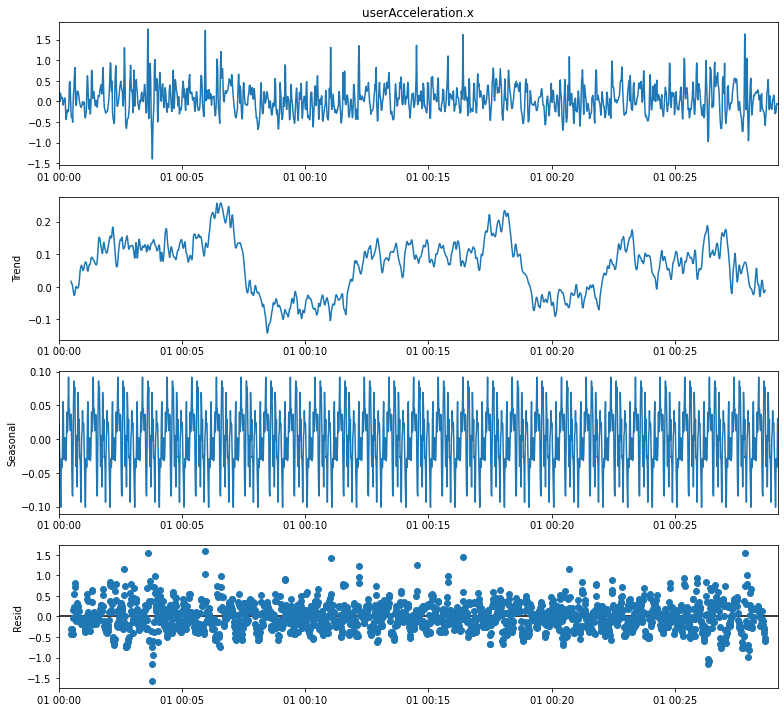

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 10
res=seasonal_decompose(sensor["userAcceleration.x"], model = "additive",period=60)
res.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

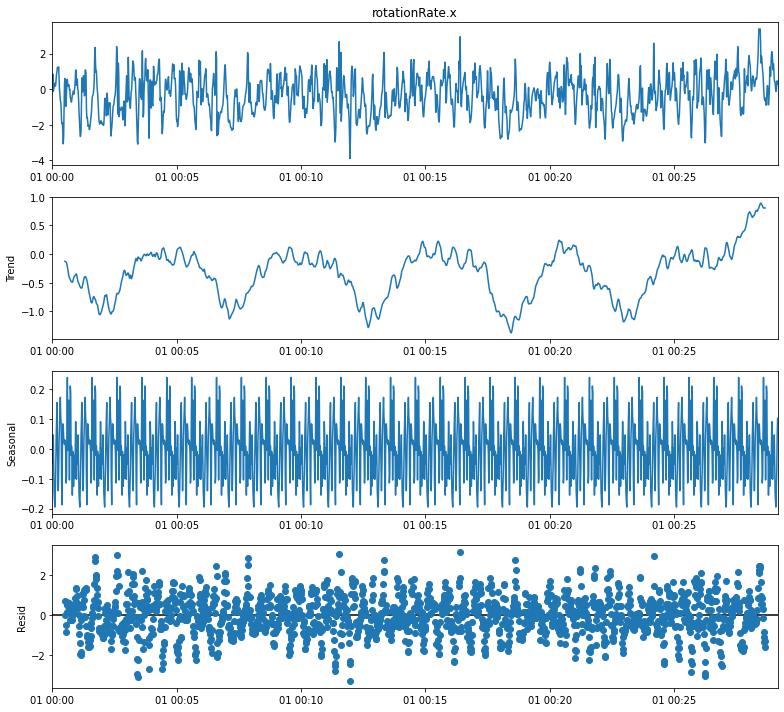

In [30]:
r = seasonal_decompose(sensor["rotationRate.x"], model = "additive",period=60)
r.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

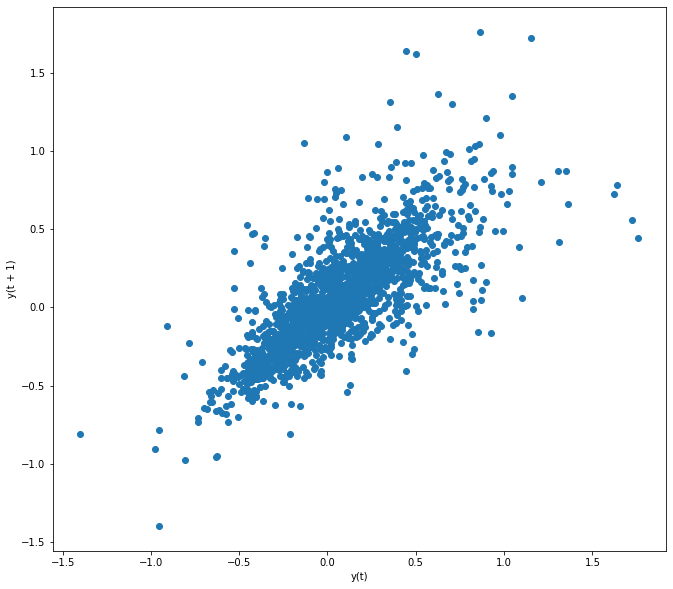

In [31]:
pd.plotting.lag_plot(sensor["userAcceleration.x"])



Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

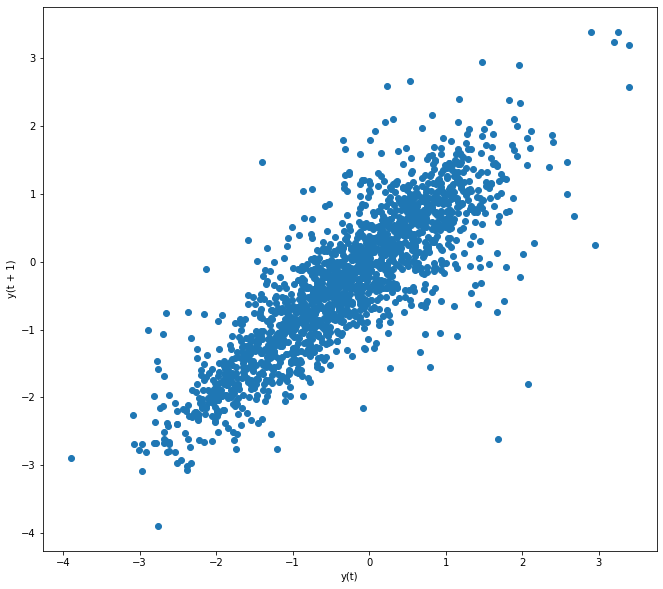

In [32]:
pd.plotting.lag_plot(sensor["rotationRate.x"])



What are your conclusions from both visualizations?

```The data we obseve has moderate correlation. 
We observe more lag between points in rotation than aceleration, maybe twice as much lag.```



The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [33]:
adfuller(sensor["userAcceleration.x"])



(-17.95799408616976,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [34]:
adfuller(sensor["rotationRate.x"])

(-5.269860625086417,
 6.320230335912331e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

```The pvalue is much lower than the critical 0.05, so we have to reject the null hypothesis.
The null Hypothesis for the Augmented Dickey Fuller test affirms the presence of unit roots 
Unit roots indicate non stationary time series data. To refejct this means we have a
Stationary time series that does not depend on time and the mean is consistent over time.```



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [71]:
# Your code here:
trn = sm.tsa.arima.ARIMA(sensor["userAcceleration.x"], order=(2,0,1))
#endog=train, exog=test
trn_fit = trn.fit()
print(trn_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 379.399
Date:                Tue, 24 Nov 2020   AIC                           -748.798
Time:                        20:12:04   BIC                           -721.458
Sample:                    01-01-2018   HQIC                          -738.692
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0625      0.016      3.930      0.000       0.031       0.094
ar.L1          0.9888      0.036     27.766      0.000       0.919       1.059
ar.L2         -0.3788      0.032    -11.686      0.0

In [72]:
test = sensor["userAcceleration.x"][-10:]
train = sensor["userAcceleration.x"][:-10]

In [75]:


history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.159721, expected=0.149749
predicted=0.096864, expected=0.038461
predicted=-0.034828, expected=-0.169175
predicted=-0.209385, expected=-0.300361
predicted=-0.280292, expected=-0.270174
predicted=-0.184377, expected=-0.268367
predicted=-0.229599, expected=-0.102444
predicted=-0.015229, expected=-0.085590
predicted=-0.112764, expected=-0.048105
predicted=-0.070922, expected=-0.065011


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [ ]:
# Your code here:

